<a href="https://colab.research.google.com/github/washingtontenorio/ferramentas-de-gerenciamento-e-implatacao/blob/main/02_estatistica_descritiva_2025_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise exploratória de dados (*exploratory data analysis*, EDA)

 - Explorar os dados para identificar padrões de interesse
 - Trabalho de detetive, que busca pistas e evidênica a serem confirmadas numa análise inferencial (Tukey 1977)
 - Não é análise de significância estatística.
 - Se utiliza de estatística descritiva e visualização de dados.

 ---

In [ ]:
# @title carregar bibliotecas
import pandas as pd
import numpy as np

# Estatística descritiva

---

![](https://fernandafperes.com.br/blog/intervalo-de-confianca/img1.png)

## População e amostra  

- **População**: Conjunto completo de elementos que queremos estudar. Pode ser, por exemplo, todos os clientes de uma empresa ou todos os habitantes de um país.  
- **Amostra**: Subconjunto da população, usado para análise quando não é viável estudar todos os elementos da população. O ato de capturar tal subconjunto de dados é chamado de "amostragem", que pode ser probabilística (aleatória simples, sistemática, estratificada e por conglomerados) ou não probabilística (por conveniência, por quotas, por julgamento, voluntária).

### Exemplo prático
O conjunto de dados `tips` contém informações de gorjetas capturadas por um garçom em um período de alguns meses quando trabalhava para um restaurante.

---

In [ ]:
# @title Leitura do conjunto de dados
df = pd.read_csv(
    'https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/tips.csv'
)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
## Tipos de variáveis



<!-- ![](https://private-user-images.githubusercontent.com/1690232/425043989-ba094f6f-f323-4da6-a0d7-1017859b0fd4.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NDI0ODI3MTUsIm5iZiI6MTc0MjQ4MjQxNSwicGF0aCI6Ii8xNjkwMjMyLzQyNTA0Mzk4OS1iYTA5NGY2Zi1mMzIzLTRkYTYtYTBkNy0xMDE3ODU5YjBmZDQucG5nP1gtQW16LUFsZ29yaXRobT1BV1M0LUhNQUMtU0hBMjU2JlgtQW16LUNyZWRlbnRpYWw9QUtJQVZDT0RZTFNBNTNQUUs0WkElMkYyMDI1MDMyMCUyRnVzLWVhc3QtMSUyRnMzJTJGYXdzNF9yZXF1ZXN0JlgtQW16LURhdGU9MjAyNTAzMjBUMTQ1MzM1WiZYLUFtei1FeHBpcmVzPTMwMCZYLUFtei1TaWduYXR1cmU9MWIwNzQwNGNjMzQ0ZWQ3NTNhNzcwYjk4ZDY0ZmZjYjE1ODRjMjI3ZGI1ZTc1NDM0ZjFhNmUwMzNlZjgyZDdlYyZYLUFtei1TaWduZWRIZWFkZXJzPWhvc3QifQ.g9JuWF2MNb0-QLbhOCdC-HZgaeL1t-fw02Sw7sawXZI) -->

### Qualitativas (categóricas)
Representam **categorias** e não possuem valores numéricos diretamente associados. São classificados em:
- **nominais**: quando não possuem ordem específica. Por exemplo, cor dos olhos (`azul`, `verde`, `castanho`).
- **ordinais**: quando possuem uma ordem hierárquica, mnas as diferenças entre os valores não são necessariamente uniformes. Por exemplo, nível de satisfação (`baixo`, `médio`, `alto`), escolaridade (`fundamental`, `médio`, `superior`).

### Quantitativas (numéricas)

Representam números e podem ser medidas. São classificadas em:

- **Discretas**: assumem valores que vem de um conjuto enumerável (contável). Por exemplo, número de clientes atendidos (`1, 2, 3, ...`), número de quartos em uma casa (`1, 2, 3, ...`).  
- **Contínuas**: podem assumir qualquer valor dentro de um intervalo, incluindo casas decimais. Por exemplo: peso (`65.3 kg`, `72kg`, `...`), altura (`1.75 m`), tempo de espera (`12.5 minutos`).

### Outras Classificações

- **cíclicas:**: variáveis que tem início e fim e estes são conectados de forma natural, formando um ciclo. Por exemplo, mês do ano, dia da semana,
- **inútil**: variáveis que não tem contribuem para análise ou podem prejudicar algum modelo de previsão. Exemplos: valores constantes, identificadores únicos, redundantes, variáveis com muitos valores faltantes.

---

In [ ]:
# Criação do dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "total_bill",
        "descricao": "Total pago da conta em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "tip",
        "descricao": "Valor da gorjeta dada ao garçom em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sex",
        "descricao": "Gênero do cliente (Male/Female).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "smoker",
        "descricao": "Indica se o cliente é fumante (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "day",
        "descricao": "Dia da semana da refeição (Thur, Fri, Sat, Sun).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "time",
        "descricao": "Período do dia em que ocorreu a refeição (Lunch/Dinner).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "size",
        "descricao": "Número de pessoas na mesa.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    }
])
df_dict

,variavel,descricao,tipo,subtipo
0,total_bill,Total pago da conta em dólares.,quantitativa,contínua
1,tip,Valor da gorjeta dada ao garçom em dólares.,quantitativa,contínua
2,sex,Gênero do cliente (Male/Female).,qualitativa,nominal
3,smoker,Indica se o cliente é fumante (Yes/No).,qualitativa,nominal
4,day,"Dia da semana da refeição (Thur, Fri, Sat, Sun).",qualitativa,nominal
5,time,Período do dia em que ocorreu a refeição (Lunc...,qualitativa,nominal
6,size,Número de pessoas na mesa.,quantitativa,discreta


## Quartil, quantil e percentil

 - **Quantil**: divide os dados em "n" partes iguais; Exemplos: quartil, decil, percentil ou centil.
 - **Percentil (ou centil)**: divide os dados ordenados em 100 partes; P1 = abaixo do qual está 1% dos dados; P42 = abaixo do qual está 42% dos dados.
 - **Quartil**: divide os dados ordenados em quatro partes; Q1 = P25, Q2 = P50, Q3 = P75.


In [ ]:
# calcular percentis e quartis
q1 = df.total_bill.quantile(0.25)
q2 = df.total_bill.quantile(0.5)
q3 = df.total_bill.quantile(0.75)

print(q1)
print(q2)
print(q3)

13.3475
17.795
24.127499999999998
10.779999999999998


---

## Medidas de tendência central

Considere o seguinte conjunto de dados $X = \{x_i\}_{i=1}^{n}$ para as definições a seguir:

 - **Moda** ($x^*$): valor que ocorre com maior frequência em um conjunto de dados.
 - **Média** ($\bar{x}$): soma de todos os valores dividida pelo número total de observações:
 $$
 \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
 $$
 - **Mediana** ($Q_2$): ponto médio dos dados, em que, quando ordenados, 50% das observações são maiores que ela e 50% são menores. Quando $n$ é impar, a mediana é igual a média aritimética dos valores centrais.


<!-- | Medida   | Descrição | Uso |
|----------|----------|-----|
| **Moda** | Valor mais frequente | Melhor para variáveis categóricas |
| **Mediana** | Valor central dos dados ordenados | Útil para dados com outliers |
| **Média** | Média aritmética dos valores | Mais comum, mas sensível a outliers | -->


### Exemplo
Para o seguinte conjunto $X = \{2, 3, 3, 2, 4\}$, qual a média, mediana e moda?

---

In [ ]:
# Exemplos
valores = np.array([2, 3, 3, 2, 50])
# print(valores)

# calcular estatísticas de tendência central
print('média', np.mean(valores))
print('mediana', np.median(valores))
# print('moda', np.mode(valores))

média 12.0
mediana 3.0


In [ ]:
# calcular estatísticas de tendência central no pandas
df.describe()



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


---

## Medidas de dispersão

 - **Amplitude ($A$)**: diferença entre o maior e o menor valor do conjunto de dados. Simples e rápida para ter uma noção geral da variação dos dados.
 $$ A = x_{max} - x_{min} $$  
 - **Intervalo Interquartil (IQR)**: diferença entre o terceiro quartil ($Q_3$) e o primeiro quartil ($Q_1$). Muito usado para detectar outliers e em boxplots.
 $$ IQR = Q_3 - Q_1 $$  
 - **Desvio Médio Absoluto (DMA)**: média das distâncias absolutas entre os valores e a média. Alternativa ao desvio padrão quando queremos uma medida menos sensível a valores extremos.
 $$ DMA = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}| $$  
 - **Variância ($s^2$ ou $\sigma^2$)**: média dos quadrados das diferenças em relação à média. Usada em modelos estatísticos, análise de variabilidade e testes de hipóteses.
 $$ s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$
 - **Desvio Padrão ($s$ ou $\sigma$)**: mede o quanto os valores se afastam da média. Muito utilizado em estatística inferencial, aprendizado de máquina e controle de qualidade.
 $$ s = \sqrt{\text{Variância}} = \sqrt{s^2} $$

---

In [ ]:
print(x[0])
print(x[1])


[ 7. 42. 68. 51. 31. 19. 12.  7.  3.  4.]
[ 3.07   7.844 12.618 17.392 22.166 26.94  31.714 36.488 41.262 46.036
 50.81 ]


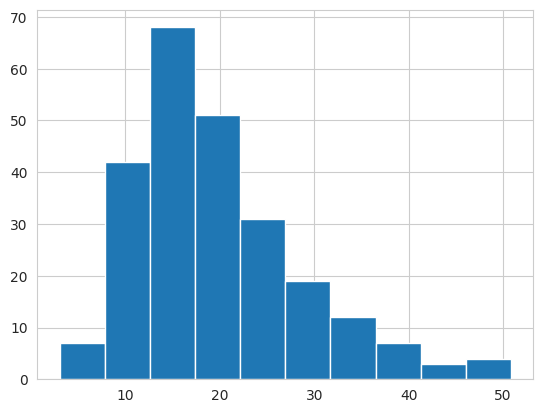

In [ ]:
from matplotlib import pyplot as plt


x = plt.hist(df.total_bill)


In [ ]:
 # amplitude
amplitude = df.total_bill.max() - df.total_bill.min()

# intervalo interquartil
iqr = df.total_bill.quantile(0.75) - df.total_bill.quantile(.25)

# desvio médio absoluto
dma = np.mean(np.abs(df.total_bill - df.total_bill.mean()))

# variância
var_total_bill = df.total_bill.var()

# desvio padrão
std_total_bill = df.total_bill.std()

cv_total_bill = df.total_bill.std() / df.total_bill.mean()

print(amplitude)
print(iqr)
print(dma)
print(var_total_bill)
print(f"{std_total_bill:.2f}")

47.74
10.779999999999998
6.8694400026874485
79.25293861397826
8.90


---
## Medidas adicionais

### Relativas

 - **Coeficiente de variação**:
 $$ CV = \frac{s}{\bar{x}} $$
 - **Escore padronizado**: quantidade de desvios padrão de distância da média.
 $$ z_n = \frac{x_n - \bar{x}}{s} $$

### Assimetria

 - **Coeficiente de assimetria de Pearson**: mede a assimetria da distribuição comparando a média e a moda ou a média e a mediana.
$$
e = \frac{\bar{x} - x^*}{s}
$$
 - **Coeficiente de assimetria de Bowley**: baseia-se nos quartis para medir a assimetria, sendo menos sensível a outliers do que o coeficiente de Pearson.
 $$
 B = \frac{(Q_3 - Q_2) - (Q_2 - Q_1)}{Q_3 - Q_1}
 $$

### Correlação

 - **Coeficiente de Assimetria de Pearson**: mede a assimetria da distribuição comparando a média e a moda ou a média e a mediana.
$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

In [ ]:
# exemplo
x = np.array([293.6, 298.7, 294.1, 299.6, 303.0, 300.3 , 300.1, 294.0, 302.4, 296.5])
y = np.array([995.6, 998.3, 993.2, 996.8, 997.8, 994.1, 993.3, 999.2, 1001.9, 999.7])


